In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')

In [3]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

- The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).

#### Content
- The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.

- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab.
- Target is to predict the last column, which is the % of silica in the iron ore concentrate.

#### Inspiration
- I have been working in this dataset for at least six months and would like to see if the community can help to answer the following questions:

    - Is it possible to predict % Silica Concentrate every minute?

    - How many steps (hours) ahead can we predict % Silica in Concentrate? This would help engineers to act in predictive and optimized way, mitigatin the % of iron that could have gone to tailings.

    - Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?

In [5]:
df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-06-16 15:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


In [6]:
# checking the nul values
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

### Replace the ',' with '.'

In [7]:
for i in df.columns:
    df[i] = df[i].apply(lambda x : x.replace(',','.'))

In [8]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


#### Feature engineering

In [9]:
import re

In [10]:
df['date'] = df['date'].apply(lambda x : re.search('[0-9]*-[0-9]*' , x).group(0)) # for getting month and year

In [11]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [12]:

#year
df['Year']=df['date'].apply(lambda x : re.search('^[^-]*' , x).group(0))

#month
df['Month'] = df['date'].apply(lambda x : re.search('[^-]*$' , x).group(0))

In [13]:
df.drop(columns='date', axis=1,inplace=True)

In [14]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Year,Month
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31,2017,03
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017,03
2,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,250.313,...,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31,2017,03
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31,2017,03
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31,2017,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,299.163,...,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71,2017,09
737449,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71,2017,09
737450,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71,2017,09
737451,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,298.045,...,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71,2017,09


In [15]:
df = df.astype('float64')

In [16]:
df.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
Year                            float64
Month                           float64


In [17]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Year,Month
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31,2017.0,3.0
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31,2017.0,3.0
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31,2017.0,3.0
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31,2017.0,3.0
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31,2017.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71,2017.0,9.0
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71,2017.0,9.0
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71,2017.0,9.0
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71,2017.0,9.0


### Data Visualization

In [18]:
x = df.drop(columns='% Silica Concentrate').values

In [19]:
x

array([[5.52000e+01, 1.69800e+01, 3.01953e+03, ..., 6.69100e+01,
        2.01700e+03, 3.00000e+00],
       [5.52000e+01, 1.69800e+01, 3.02441e+03, ..., 6.69100e+01,
        2.01700e+03, 3.00000e+00],
       [5.52000e+01, 1.69800e+01, 3.04346e+03, ..., 6.69100e+01,
        2.01700e+03, 3.00000e+00],
       ...,
       [4.97500e+01, 2.32000e+01, 2.69220e+03, ..., 6.42700e+01,
        2.01700e+03, 9.00000e+00],
       [4.97500e+01, 2.32000e+01, 1.16412e+03, ..., 6.42700e+01,
        2.01700e+03, 9.00000e+00],
       [4.97500e+01, 2.32000e+01, 1.16412e+03, ..., 6.42700e+01,
        2.01700e+03, 9.00000e+00]])

In [20]:
y = df.iloc[:,-3].values

In [21]:
y

array([1.31, 1.31, 1.31, ..., 1.71, 1.71, 1.71])

### Feature Scaling 

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
x

array([[-0.21225167,  0.34202086,  0.12375664, ...,  1.66266665,
         0.        , -1.827297  ],
       [-0.21225167,  0.34202086,  0.12777243, ...,  1.66266665,
         0.        , -1.827297  ],
       [-0.21225167,  0.34202086,  0.14344883, ...,  1.66266665,
         0.        , -1.827297  ],
       ...,
       [-1.26891589,  1.25572783, -0.14560578, ..., -0.69733357,
         0.        ,  1.80686228],
       [-1.26891589,  1.25572783, -1.40307479, ..., -0.69733357,
         0.        ,  1.80686228],
       [-1.26891589,  1.25572783, -1.40307479, ..., -0.69733357,
         0.        ,  1.80686228]])

In [24]:
# Separating the x and y for Training purpose
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
xtrain

array([[ 0.05336851, -0.17359192, -1.89555611, ...,  0.2055453 ,
         0.        , -1.22160379],
       [-1.34646923,  1.50545482,  0.13211738, ...,  0.25918167,
         0.        ,  0.59547585],
       [-1.08472672,  1.25132089,  0.84143925, ...,  0.12509075,
         0.        , -0.01021736],
       ...,
       [-0.09592166,  0.11873555,  0.70774142, ..., -1.03703058,
         0.        ,  0.59547585],
       [ 0.09214518, -0.04138352,  0.53451109, ...,  0.34857562,
         0.        ,  0.59547585],
       [-0.21806817, -0.04432148, -0.70139774, ..., -0.79566692,
         0.        , -1.22160379]])

In [27]:
df.columns.size

25

In [26]:
# Importing libraries of Neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats.morestats import optimize

In [30]:
ann = Sequential() 
ann.add(Dense(units = 20, activation = 'relu')) # hidden Layer 1
ann.add(Dense(units = 22, activation = 'relu')) # hidden Layer 2

ann.add(Dense(units = 1, activation = 'linear')) # output layer
# where activation function is by default set as 'linear'.

ann.compile(optimizer='adam', loss = 'mse')

ann.fit(xtrain,ytrain,validation_data = (xtest,ytest) ,epochs = 10)

Epoch 1/10
16132/16132 [==============================] - 35s 2ms/step - loss: 0.3060 - val_loss: 0.2512
Epoch 2/10
16132/16132 [==============================] - 45s 3ms/step - loss: 0.2358 - val_loss: 0.2252
Epoch 3/10
16132/16132 [==============================] - 49s 3ms/step - loss: 0.2228 - val_loss: 0.2165
Epoch 4/10
16132/16132 [==============================] - 57s 4ms/step - loss: 0.2161 - val_loss: 0.2114
Epoch 5/10
16132/16132 [==============================] - 49s 3ms/step - loss: 0.2125 - val_loss: 0.2081
Epoch 6/10
16132/16132 [==============================] - 73s 5ms/step - loss: 0.2097 - val_loss: 0.2171
Epoch 7/10
16132/16132 [==============================] - 70s 4ms/step - loss: 0.2070 - val_loss: 0.2086
Epoch 8/10
16132/16132 [==============================] - 69s 4ms/step - loss: 0.2044 - val_loss: 0.2056
Epoch 9/10
16132/16132 [==============================] - 75s 5ms/step - loss: 0.2023 - val_loss: 0.2019
Epoch 10/10
16132/16132 [==============================

In [31]:
model_loss = ann.history.history
model_loss

{'loss': [0.3059721291065216,
  0.2357918620109558,
  0.2227659523487091,
  0.21613837778568268,
  0.21248690783977509,
  0.20970889925956726,
  0.20696069300174713,
  0.20441126823425293,
  0.20228251814842224,
  0.20096458494663239],
 'val_loss': [0.25121110677719116,
  0.22515486180782318,
  0.21653515100479126,
  0.21140433847904205,
  0.20805136859416962,
  0.21705381572246552,
  0.20855234563350677,
  0.20562338829040527,
  0.20189322531223297,
  0.2019609808921814]}

In [32]:
df_loss = pd.DataFrame(model_loss)
df_loss

,loss,val_loss
0,0.305972,0.251211
1,0.235792,0.225155
2,0.222766,0.216535
3,0.216138,0.211404
4,0.212487,0.208051
5,0.209709,0.217054
6,0.206961,0.208552
7,0.204411,0.205623
8,0.202283,0.201893
9,0.200965,0.201961


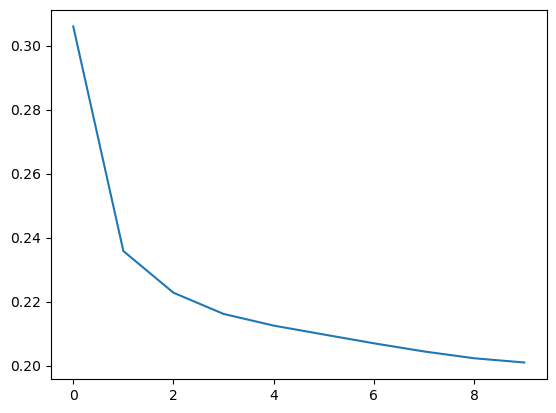

In [33]:
plt.plot(df_loss['loss'])

In [34]:
ypred = ann.predict(xtest)

6914/6914 [==============================] - 11s 2ms/step


In [35]:
ypred

array([[3.7732546],
       [3.156272 ],
       [3.147696 ],
       ...,
       [4.122887 ],
       [2.9133432],
       [4.070242 ]], dtype=float32)

In [36]:
# the reason behind using flatten is yped is 2d array
# flatten cahnges 2d array to 1d array.

In [37]:
pd.DataFrame({'Actual value': ytest, 'Predicted value': ypred.flatten()})

,Actual value,Predicted value
0,2.610000,3.773255
1,1.117835,3.156272
2,4.290000,3.147696
3,2.070000,1.812962
4,1.620000,2.250578
...,...,...
221231,3.360000,3.107879
221232,1.250000,1.392713
221233,3.923518,4.122887
221234,2.070000,2.913343


#### Model Evaluation

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(ytest,ypred)

0.840950557041344